In [8]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [43]:
# large dataset of retropgf3 projects and associated metrics
# note: a few projects have been removed and/or merged

df = pd.read_csv("retropgf3_impact_data_snapshot.csv", index_col=0)
df.iloc[0]

Result: # Ballots                                                                    101
Result: Median OP                                                               500000.0
Result: Quorum Reached                                                              True
Result: Received OP                                                            496896.42
Meta: Project Name                                                           go-ethereum
Meta: Applicant Type                                                             PROJECT
Meta: Website                                    https://github.com/ethereum/go-ethereum
Meta: Bio                                             An Ethereum execution layer client
Meta: Payout Address                          0x0000006916a87b82333f4245046623b23794C65C
Category: Collective Governance                                                        0
Category: Developer Ecosystem                                                          1
Category: End User Ex

In [44]:
def log(dataframe, val_col, thresh=0.00001):
    # get the log of a series
    series = (
        dataframe[val_col]
        .dropna()
        .sort_values(ascending=False)
    )
    return np.log(series[series>=thresh])

def standard(dataframe, val_col, thresh=0):
    # get the standard normal distribution of a series
    series = (
        dataframe[val_col]
        .dropna()
        .sort_values(ascending=False)
    )
    return series[series>=thresh]

def get_stdevs(vector):
    # get the number of standard deviations for each value
    mu = vector.mean()
    sigma = vector.std()
    stdevs = vector.apply(lambda x: (x-mu)/sigma)
    return stdevs

def analyze_impact_vector(dataframe, func, ind_val, dep_val):
    # create a dataframe showing an impact vector and rpgf3 results
    v = func(dataframe, ind_val)
    x = get_stdevs(v)
    y = dataframe.loc[x.index, dep_val]
    return pd.concat([x,y], axis=1)

test = analyze_impact_vector(df, standard, 'OSO: Downloads Last 6 Months', 'Result: Received OP')
test.head()

,OSO: Downloads Last 6 Months,Result: Received OP
Project ID,,
0x32ee121e0dbcef2fe2b7a8e668f9a53ddc6d43e16c423fe8b4595b0120ac08d8,3.204649,298137.85
0xc593432238cfdcaf9bb9c5d5b87e447f2b6a42d59a91135e0119cccc0d15aa32,2.013140,198758.57
0x912e6971c43c3a46dbb82d1358af205530663ef01c2fb0691d843a9f72293689,1.687400,248448.21
0x9d1718c287c5d346ddcdaba1ea67709d8c86fb86736fc38b0be12b118e938f47,1.343354,248448.21
0x31588517386990050541aed3f6d4d5a370e30fcd5bf622886c1955ffc9565f52,0.478379,280249.58


,OSO: Downloads Last 6 Months,Result: Received OP
OSO: Downloads Last 6 Months,1.000000,0.771946
Result: Received OP,0.771946,1.000000


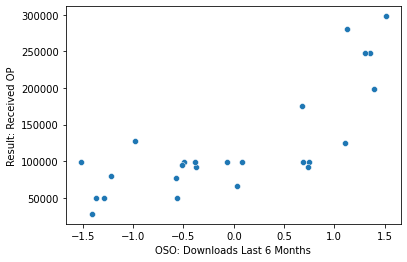

In [45]:
# analyze impact vector (example 1)

impact_vector = 'OSO: Downloads Last 6 Months'
dependent_val = 'Result: Received OP'
result = analyze_impact_vector(df, log, impact_vector, dependent_val)
sns.scatterplot(data=result, x=impact_vector, y=dependent_val)
result.corr()

,OSO: Avg Monthly Active Devs Last 6 Months,Result: Received OP
OSO: Avg Monthly Active Devs Last 6 Months,1.000000,0.438263
Result: Received OP,0.438263,1.000000


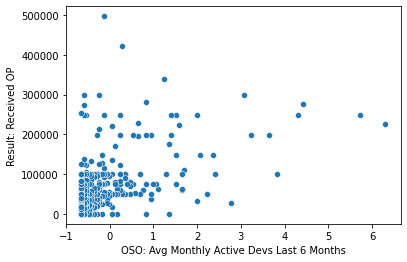

In [47]:
# analyze impact vector (example 2)

impact_vector = 'OSO: Avg Monthly Active Devs Last 6 Months'
dependent_val = 'Result: Received OP'
result = analyze_impact_vector(df, standard, impact_vector, dependent_val)
sns.scatterplot(data=result, x=impact_vector, y=dependent_val)
result.corr()